## Observations and Insights 

In [ ]:
#You must use proper labeling of your plots, to include properties such as: plot titles, axis labels, legend labels, 
#_x_-axis and _y_-axis limits, etc.

#See the [starter workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for help on what modules to import and 
#expected format of the notebook.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from itertools import cycle, islice
#import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results = study_results.rename(columns={"Drug Regimen":"Drug_Regimen", "Tumor Volume (mm3)":"Tumor_Volume_mm3", "Mouse ID":"Mouse_ID"})
mouse_metadata = mouse_metadata.rename(columns={"Drug Regimen":"Drug_Regimen", "Mouse ID":"Mouse_ID"})

mouse_study_df = pd.merge(mouse_metadata, study_results)

mouse_study_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
a = mouse_metadata["Mouse_ID"].nunique()
b = study_results["Mouse_ID"].nunique()
c = mouse_study_df["Mouse_ID"].nunique()
a, b, c

(249, 249, 249)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://stackoverflow.com/questions/29276958/identifying-duplicate-pairs-in-python-pandas
find_dup = mouse_study_df.groupby(['Mouse_ID', 'Timepoint']).size()                                 
find_dup = find_dup[find_dup > 1]
find_dup

Mouse_ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# One copy of g989 seems to have died...
dup = mouse_study_df.loc[mouse_study_df['Mouse_ID'] == "g989"]
dup

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_df[mouse_study_df["Mouse_ID"] != "g989"]
mouse_study_clean_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean_df["Mouse_ID"].nunique()

248

In [7]:
#Put placebo results first

#This seems harder than it should be, but none of the easier-looking suggestions I found did more than put the \
#treatments in alphabetical order.
#https://stackoverflow.com/questions/43266211/sort-a-dataframe-based-on-values-of-another-column-using-integer-data-type                                                     
#https://stackoverflow.com/questions/23279238/custom-sorting-with-pandas

drugs = mouse_study_clean_df.Drug_Regimen.unique()
#drugs
order = {'Placebo':0,'Ramicane':1, 'Capomulin':2, 'Infubinol':3,  'Ceftamin':4, 'Stelasyn':5, 'Zoniferol':6, 'Ketapril':7, 'Propriva':8, 'Naftisol':9}
mouse_study_clean_df.loc[:,'rank'] = mouse_study_clean_df['Drug_Regimen'].map(order)
mouse_study_clean_df = mouse_study_clean_df.iloc[mouse_study_clean_df['rank'].argsort()]
mouse_study_clean_df = mouse_study_clean_df.drop(labels=['rank'],axis=1)
mouse_study_clean_df

/Users/bmacgreg/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/bmacgreg/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
952,i477,Placebo,Female,3,30,10,47.520632,0
965,i669,Placebo,Female,18,27,10,48.281633,1
964,i669,Placebo,Female,18,27,5,46.764668,1
963,i669,Placebo,Female,18,27,0,45.000000,0
951,i477,Placebo,Female,3,30,5,46.657385,0
...,...,...,...,...,...,...,...,...
852,f993,Naftisol,Male,21,28,0,45.000000,0
853,f993,Naftisol,Male,21,28,5,46.395760,0
854,f993,Naftisol,Male,21,28,10,48.185373,0
1463,r604,Naftisol,Male,7,30,35,59.217000,2


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mice_by_drugs = mouse_study_clean_df.groupby("Drug_Regimen")
#drugs = mouse_study_clean_df.Drug_Regimen.unique()
#mice_by_drugs
mean = mice_by_drugs["Tumor_Volume_mm3"].mean()
median = mice_by_drugs["Tumor_Volume_mm3"].median()
variance = mice_by_drugs["Tumor_Volume_mm3"].var()
std = mice_by_drugs["Tumor_Volume_mm3"].std()
sem = mice_by_drugs["Tumor_Volume_mm3"].sem()

mouse_study_stats_df = pd.merge(mean, median, on=["Drug_Regimen"])
mouse_study_stats_df = mouse_study_stats_df.rename(columns = {"Tumor_Volume_mm3_x":"mean", "Tumor_Volume_mm3_y":"median"})
mouse_study_stats_df = pd.merge(mouse_study_stats_df, variance, on=["Drug_Regimen"])
mouse_study_stats_df = mouse_study_stats_df.rename(columns = {"Tumor_Volume_mm3":"variance"})
mouse_study_stats_df = pd.merge(mouse_study_stats_df, std, on=["Drug_Regimen"])
mouse_study_stats_df = mouse_study_stats_df.rename(columns = {"Tumor_Volume_mm3":"std"})
mouse_study_stats_df = pd.merge(mouse_study_stats_df, sem, on=["Drug_Regimen"])
mouse_study_stats_df = mouse_study_stats_df.rename(columns = {"Tumor_Volume_mm3":"sem"})

#Put placebo results first
order = pd.Categorical(['Placebo','Ramicane', 'Capomulin', 'Infubinol',  'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'], ordered=True)
mouse_study_stats_df = mouse_study_stats_df.reindex(order)
mouse_study_stats_df

,mean,median,variance,std,sem
Drug_Regimen,,,,,
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
#https://stackoverflow.com/questions/55388610/how-to-calculate-aggregated-summary-statistics-in-pandas-dataframe

summary_table = mouse_study_clean_df.groupby(["Drug_Regimen"]).agg({"Tumor_Volume_mm3":['mean', 'median', 'var', 'std', 'sem']})
#Put placebo results first
order = pd.Categorical(['Placebo','Ramicane', 'Capomulin', 'Infubinol',  'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'], ordered=True)
summary_table = summary_table.reindex(order)
summary_table

Tumor_Volume_mm3                                          
                         mean     median        var       std       sem
Drug_Regimen                                                           
Placebo             54.033581  52.288934  61.168083  7.821003  0.581331
Ramicane            40.216745  40.673236  23.486704  4.846308  0.320955
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Infubinol           52.884795  51.820584  43.128684  6.567243  0.492236
Ceftamin            52.591172  51.776157  39.290177  6.268188  0.469821
Stelasyn            54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol           53.236507  51.818479  48.533355  6.966589  0.516398
Ketapril            55.235638  53.698743  68.553577  8.279709  0.603860
Propriva            52.320930  50.446266  43.852013  6.622085  0.544332
Naftisol            54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

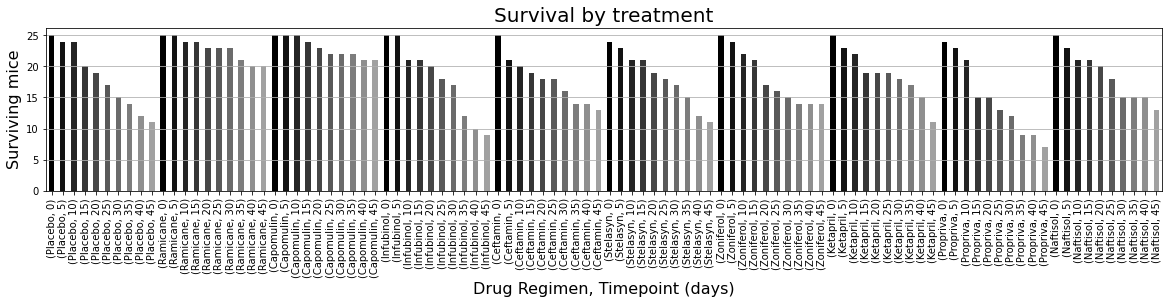

In [10]:
#Generate a bar plot using `DataFrame.plot()` that shows  the number of 
#total mice for each treatment regimen throughout the course of the study.

#In real life I would probably go to Illustrator to make a more user-friendly x-axis.

#https://stackoverflow.com/questions/39275294/sort-by-certain-order-situation-pandas-dataframe-groupby

#Put placebo results first
ordered_drugs = ['Placebo','Ramicane', 'Capomulin', 'Infubinol',  'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
order = pd.api.types.CategoricalDtype(categories=ordered_drugs, ordered=True)
mouse_study_clean_df['Drug_Regimen'] = mouse_study_clean_df['Drug_Regimen'].astype(order)

drug_group = mouse_study_clean_df.groupby(['Drug_Regimen', 'Timepoint'])

count_mice = drug_group['Mouse_ID'].count()

my_colors = list(islice(cycle(['0', '.07', '0.14', '0.21', '0.28', '0.35', '0.42', '0.49', '0.56', '0.63']), None, len(drug_group)))

ax=count_mice.plot(kind="bar", figsize=(20,3), legend=False, title="Survival by treatment", color=my_colors)

ax.set_ylabel("Surviving mice", size=16)
ax.set_xlabel("Drug Regimen, Timepoint (days)", size=16)
ax.set_title("Survival by treatment", size=20)
ax.grid(axis='y')

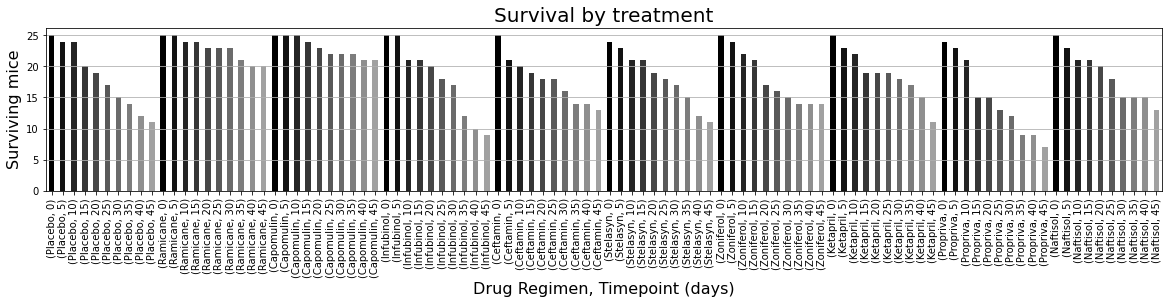

In [11]:
#Generate a bar plot using Matplotlib's `pyplot`.

#In real life I would probably go to Illustrator to make a more user-friendly x-axis.

#Put placebo results first
ordered_drugs = ['Placebo','Ramicane', 'Capomulin', 'Infubinol',  'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
order = pd.api.types.CategoricalDtype(categories=ordered_drugs, ordered=True)
mouse_study_clean_df.loc['Drug_Regimen'] = mouse_study_clean_df['Drug_Regimen'].astype(order)

drug_group = mouse_study_clean_df.groupby(['Drug_Regimen', 'Timepoint'])

count_mice = drug_group['Mouse_ID'].count()

colors = '0', '.07', '0.14', '0.21', '0.28', '0.35', '0.42', '0.49', '0.56', '0.63'

count_chart = count_mice.plot(kind='bar', color=colors, figsize=(20,3))
plt.title("Survival by treatment", size=20)
plt.ylabel("Surviving mice", size=16)
plt.xlabel("Drug Regimen, Timepoint (days)", size=16)
plt.grid(axis='y')
plt.show()

Text(0.5, 1.0, 'Mice by sex')

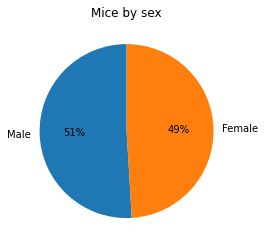

In [12]:
#Generate a pie plot using Pandas's `DataFrame.plot()` that shows the distribution of female or male mice in the study.

ax=mouse_study_clean_df['Sex'].value_counts().plot.pie(startangle=90, autopct='%1.0f%%', label='')
ax.set_title("Mice by sex")



<function matplotlib.pyplot.show(*args, **kw)>

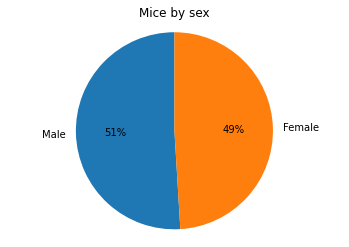

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels="Male", "Female"
plt.pie(mouse_study_clean_df['Sex'].value_counts(), labels=labels, autopct='%1.0f%%', startangle=90)
plt.title("Mice by sex")
plt.axis('equal')
plt.show



## Quartiles, Outliers and Boxplots

drugs = list(mouse_study_stats_df.axes[0].tolist())
time_points = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
mouse_IDs = list(mouse_study_clean_df.axes[1].tolist())
mouse_IDs = mouse_study_clean_df.('Mouse ID').unique()
mouse_IDs

In [100]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment 
#regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and 
#quantitatively determine if there are any potential outliers across all four treatment regimens.

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_timepoints = mouse_study_clean_df.groupby(['Drug_Regimen','Mouse_ID'])['Timepoint'].idxmax()
final_timepoint_indices=final_timepoints.aggregate(lambda x: [x.tolist()], axis=0)
rows= [309, 299, 64, 244, 360, 440, 204, 337, 317, 380, 282, 39, 144, 1455, 134, 390, 19, 370, 164, 104, 350, 340, 224, 29, 124, 493, 594, 600, 617, 840, 940, 993, 1033, 1112, 1119, 1122, 1132, 1162, 1260, 1379, 1406, 1551, 1582, 1583, 1670, 1743, 1773, 1797, 1845, 1855, 463, 473, 530, 540, 637, 669, 742, 800, 834, 949, 1053, 1076, 1205, 1225, 1312, 1314, 1397, 1485, 1616, 1632, 1640, 1683, 1726, 1813, 1872, 513, 696, 725, 735, 764, 824, 851, 864, 884, 930, 938, 1043, 1102, 1193, 1203, 1246, 1277, 1334, 1354, 1390, 1593, 1605, 1627, 1703, 1823, 567, 610, 774, 790, 810, 856, 1013, 1142, 1152, 1169, 1215, 1294, 1465, 1475, 1571, 1599, 1614, 1645, 1752, 1753, 1803, 1835, 1857, 1882, 1892, 483, 577, 657, 706, 716, 784, 952, 968, 983, 1163, 1237, 1267, 1304, 1424, 1444, 1479, 1498, 1501, 1561, 1576, 1619, 1648, 1678, 1787, 1833, 550, 751, 893, 903, 962, 1063, 1099, 1216, 1218, 1228, 1280, 1290, 1360, 1451, 1492, 1508, 1540, 1598, 1658, 1693, 1736, 1739, 1742, 1862, 327, 430, 214, 174, 289, 154, 272, 400, 49, 184, 254, 94, 194, 9, 74, 114, 420, 262, 234, 447, 59, 410, 449, 453, 84, 500, 523, 587, 627, 679, 822, 907, 937, 978, 1023, 1058, 1086, 1179, 1315, 1369, 1387, 1528, 1530, 1550, 1636, 1709, 1734, 1763, 1859, 510, 557, 593, 647, 667, 689, 752, 755, 814, 836, 850, 874, 1003, 1068, 1096, 1183, 1250, 1325, 1344, 1416, 1434, 1518, 1660, 1719, 1777]
collection = mouse_study_clean_df.loc[rows]
#collection
best_drugs_final_timepoints_df = collection[collection["Drug_Regimen"].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
best_drugs_final_timepoints_df
#best_drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#best_drugs_final_timepoints_df.dtypes
#drugs = list(mouse_study_stats_df.axes[0].tolist()) 
#time_points = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45] 
#mouse_IDs = mouse_study_clean_df['Mouse ID'].unique()
#DataFrame.idxmax(self, axis=0, skipna=True) → pandas.core.series.Series

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
59,s508,Ramicane,Male,1,17,45,30.276232,0
410,u196,Ramicane,Male,18,25,45,40.667713,3
449,w678,Ramicane,Female,5,24,5,43.166373,0
453,y449,Ramicane,Male,19,24,15,44.183451,0


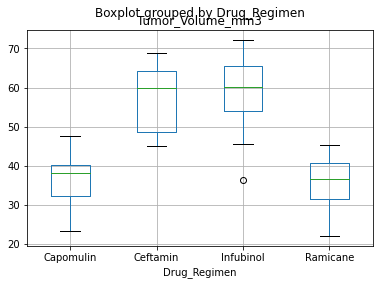

In [101]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 
#and highlight any potential outliers in the plot by changing their color and style.

#Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page]
#(https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) 
#for help with changing the style of the outliers.
#tumor_size_boxplot = best_drugs_final_timepoints_df.boxplot(column="Tumor Volume (mm3)")


tumor_size_boxplot = best_drugs_final_timepoints_df.boxplot(column="Tumor_Volume_mm3", by="Drug_Regimen")
#best_drugs_final_timepoints_df.boxplot(column="Tumor Volume (mm3)", by="Drug_Regimen", ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds)


In [ ]:
#https://codereview.stackexchange.com/questions/166794/nested-for-loop-to-create-list-of-lists-python
#https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/#:~:text=Pandas%20has%20iterrows()%20function,the%20content%20of%20the%20iterator.
#https://stackoverflow.com/questions/14819849/create-lists-of-unique-names-in-a-for-loop-in-python


#listOfDFRows = best_drugs_final_timepoints_df.transpose().values.tolist()
#print(listOfDFRows)
#print(type(listOfDFRows))



# Put treatments into a list for for loop (and later for plot labels)
#best_drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
#tumor_volume = ([])
best_drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Tumor_size_by_drugs = {drug:[] for drug in best_drugs_list}
#{drug:[] for drug in best_drugs_list}
#print(Tumor_size_by_drugs)
#{drug:[] for drug in best_drugs_list}
#tumor_volume_by_drug = ([])
    #tumor_volume_by_drug.append(i)
for drug in best_drugs_list:    #print(tumor_volume_by_drug)
    #print(drug)
    #drug.append(0)
    #print({drug:[]})
    dict = {drug:[]}
    for row in best_drugs_final_timepoints_df.itertuples():
#        #print(row.Drug_Regimen, row.Tumor_Volume_mm3)
        if row.Drug_Regimen == drug:
#            print(row.Drug_Regimen)
            dict.append(row.Tumor_Volume_mm3)
print(drug)
    
#for j in best_drugs_final_timepoints_df:    
#    if j[2] == i:
#        tumor_volume_by_drug.append(j[1])
#    print(tumor_volume_by_drug)
    #tumor_volume_by_drug.append(best_drugs_final_timepoints_df["Tumor Volume (mm3)"])
    #print(tumor_volume)

   
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
#quartiles = temperatures.quantile([.25,.5,.75])
    
#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_size_boxplot_by_mouse = best_drugs_final_timepoints_df.boxplot(column=["Tumor Volume (mm3)", "Mouse ID"], by="Drug_Regimen")

## Line and Scatter Plots

In [ ]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin treatment regimen.

#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. timepoint for that mouse.


# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume 
#for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.


In [ ]:
#Look across all previously generated figures and tables and write at least three observations or inferences 
#that can be made from the data. Include these observations at the top of notebook.